### Business objective/understanding

As part of this analysis, the intent is to observe the trend in the technology industry over the years. The data is taken from stackoverflow survey from 2011 to 2021 and the following are the main questions of interest?

- Growth of Women in Technology?
- Which country has the most developers?
- Most popular Development Environment?

For each of the questions to be answered, each year's data is explored to understand which column makes sense and are used directly over here (missing values are not taken into consideration for any computation)

### Import relevant libraries

In [26]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

import collections
import chardet

pd.set_option('display.max_columns', 500)

### Read the data files

In [27]:
'''read the csv files from 2011 to 2019 and understanding the data to decide what questions I would like to answer'''

# df_2011 = pd.read_csv('2011 Stack Overflow Survey Results.csv', low_memory=False)
# df_2012 = pd.read_csv('2012 Stack Overflow Survey Results.csv', low_memory=False)
df_2013 = pd.read_csv('2013 Stack Overflow Survey Responses.csv', low_memory=False)
df_2014 = pd.read_csv('2014 Stack Overflow Survey Responses.csv', low_memory=False)
df_2015 = pd.read_csv('2015 Stack Overflow Developer Survey Responses.csv', header=1, low_memory=False)
df_2016 = pd.read_csv('2016 Stack Overflow Survey Responses.csv', low_memory=False)
df_2017 = pd.read_csv('2017 survey_results_public.csv', low_memory=False)
df_2018 = pd.read_csv('2018 survey_results_public.csv', low_memory=False)
df_2019 = pd.read_csv('2019 survey_results_public.csv', low_memory=False)
df_2020 = pd.read_csv('2020 survey_results_public.csv', low_memory=False)
df_2021 = pd.read_csv('2021 survey_results_public.csv', low_memory=False)

In [28]:
# df_2015

Note:
    
Directly reading the files for the years 2011, 2012 gives an error related to encoding (which means the encoding is not utf-8)

And for the data for the year 2015, first row is to be skipped 

#### find the file-encoding 

In [29]:
with open('2011 Stack Overflow Survey Results.csv', 'rb') as f:
    data_encoding_2011 = chardet.detect(f.read())

In [30]:
with open('2012 Stack Overflow Survey Results.csv', 'rb') as f:
    data_encoding_2012 = chardet.detect(f.read())

In [31]:
data_encoding_2011

{'encoding': 'ISO-8859-1', 'confidence': 0.73, 'language': ''}

In [32]:
data_encoding_2012

{'encoding': 'Windows-1252', 'confidence': 0.73, 'language': ''}

### Read the data for the years 2011, 2012

In [33]:
df_2011 = pd.read_csv('2011 Stack Overflow Survey Results.csv', low_memory=False, encoding=data_encoding_2011["encoding"])
df_2012 = pd.read_csv('2012 Stack Overflow Survey Results.csv', low_memory=False, encoding=data_encoding_2011["encoding"])

### Data understanding

In [34]:
def df_properties(input_df, year, country_col):
    
    """Input: dataframe
    
    This function analyzes and prints the following:
        - shape of the dataframe
        - number of null values in each column
        - how many unique countries are represented in the given dataset
    """
    print("-------------------------------------")
    
    print("Summarizing the details for the survey results for the year: ", str(year))
    print("The shape of the dataframe is: ", str(input_df.shape))
    
    print(input_df.isna().sum())
    
    print("This dataset appears to have captured responses from ", str(input_df[country_col].nunique()), " countries")
    print("-------------------------------------")

In [35]:
df_properties(df_2011, 2011, "What Country or Region do you live in?")

-------------------------------------
Summarizing the details for the survey results for the year:  2011
The shape of the dataframe is:  (2814, 65)
What Country or Region do you live in?                                                                0
Which US State or Territory do you live in?                                                        1784
How old are you?                                                                                     84
How many years of IT/Programming experience do you have?                                             84
How would you best describe the industry you work in?                                                84
                                                                                                   ... 
Unnamed: 60                                                                                        1989
Unnamed: 61                                                                                        2499
Unnamed: 62         

In [36]:
df_properties(df_2012, 2012, "What Country or Region do you live in?")

-------------------------------------
Summarizing the details for the survey results for the year:  2012
The shape of the dataframe is:  (6244, 75)
What Country or Region do you live in?                                0
Which US State or Territory do you live in?                        4468
How old are you?                                                    279
How many years of IT/Programming experience do you have?            279
How would you best describe the industry you currently work in?     279
                                                                   ... 
Unnamed: 70                                                        1136
What advertisers do you remember seeing on Stack Overflow?         4263
What is your current Stack Overflow reputation?                    1101
Which of our sites do you frequent most?                           1047
Unnamed: 74                                                        5991
Length: 75, dtype: int64
This dataset appears to have captur

In [37]:
df_properties(df_2013, 2013, "What Country or Region do you live in?")

-------------------------------------
Summarizing the details for the survey results for the year:  2013
The shape of the dataframe is:  (9743, 128)
What Country or Region do you live in?                                1
Which US State or Territory do you live in?                        6583
How old are you?                                                    308
How many years of IT/Programming experience do you have?            306
How would you best describe the industry you currently work in?     306
                                                                   ... 
What is your current Stack Overflow reputation?                    2310
How do you use Stack Overflow?                                     2686
Unnamed: 125                                                       4820
Unnamed: 126                                                       3817
Unnamed: 127                                                       9141
Length: 128, dtype: int64
This dataset appears to have capt

In [38]:
df_properties(df_2014, 2014, "What Country do you live in?")

-------------------------------------
Summarizing the details for the survey results for the year:  2014
The shape of the dataframe is:  (7644, 120)
What Country do you live in?                                                                                        0
Unnamed: 1                                                                                                       7643
Which US State or Territory do you live in?                                                                      5535
How old are you?                                                                                                  297
What is your gender?                                                                                              297
                                                                                                                 ... 
Unnamed: 115                                                                                                     2717
Unnamed: 116             

In [39]:
df_properties(df_2015, 2015, "Country")

-------------------------------------
Summarizing the details for the survey results for the year:  2015
The shape of the dataframe is:  (26086, 222)
Country                                                807
Age                                                    255
Gender                                                 342
Tabs or Spaces                                         279
Years IT / Programming Experience                     1259
                                                     ...  
Why answer: Self promotion                           22768
Why answer: Sense of responsibility to developers    20911
Why answer: No idea                                  25064
Why answer: I don't answer and I don't want to       25384
Why answer: I don't answer but I want to             20386
Length: 222, dtype: int64
This dataset appears to have captured responses from  156  countries
-------------------------------------


In [40]:
df_properties(df_2016, 2016, "country")

-------------------------------------
Summarizing the details for the survey results for the year:  2016
The shape of the dataframe is:  (56030, 66)
Unnamed: 0                      0
collector                       0
country                       502
un_subregion                  717
so_region                     640
                            ...  
important_companymission    13501
important_wfh               13448
important_ownoffice         13492
developer_challenges        14934
why_stack_overflow          14237
Length: 66, dtype: int64
This dataset appears to have captured responses from  175  countries
-------------------------------------


In [41]:
df_properties(df_2017, 2017, "Country")

-------------------------------------
Summarizing the details for the survey results for the year:  2017
The shape of the dataframe is:  (51392, 154)
Respondent                  0
Professional                0
ProgramHobby                0
Country                     0
University                  0
                        ...  
QuestionsInteresting    16856
QuestionsConfusing      16973
InterestedAnswers       16780
Salary                  38501
ExpectedSalary          48826
Length: 154, dtype: int64
This dataset appears to have captured responses from  201  countries
-------------------------------------


In [42]:
df_properties(df_2018, 2018, "Country")

-------------------------------------
Summarizing the details for the survey results for the year:  2018
The shape of the dataframe is:  (98855, 129)
Respondent           0
Hobby                0
OpenSource           0
Country            412
Student           3954
                 ...  
Age              34281
Dependents       36259
MilitaryUS       83074
SurveyTooLong    32914
SurveyEasy       32976
Length: 129, dtype: int64
This dataset appears to have captured responses from  183  countries
-------------------------------------


In [43]:
df_properties(df_2019, 2019, "Country")

-------------------------------------
Summarizing the details for the survey results for the year:  2019
The shape of the dataframe is:  (88883, 85)
Respondent          0
MainBranch        552
Hobbyist            0
OpenSourcer         0
OpenSource       2041
                ...  
Sexuality       12736
Ethnicity       12215
Dependents       5824
SurveyLength     1899
SurveyEase       1802
Length: 85, dtype: int64
This dataset appears to have captured responses from  179  countries
-------------------------------------


In [44]:
df_properties(df_2020, 2020, "Country")

-------------------------------------
Summarizing the details for the survey results for the year:  2020
The shape of the dataframe is:  (64461, 61)
Respondent                0
MainBranch              299
Hobbyist                 45
Age                   19015
Age1stCode             6561
                      ...  
WebframeWorkedWith    22182
WelcomeChange         11778
WorkWeekHrs           23310
YearsCode              6777
YearsCodePro          18112
Length: 61, dtype: int64
This dataset appears to have captured responses from  183  countries
-------------------------------------


In [45]:
df_properties(df_2021, 2021, "Country")

-------------------------------------
Summarizing the details for the survey results for the year:  2021
The shape of the dataframe is:  (83439, 48)
ResponseId                          0
MainBranch                          0
Employment                        116
Country                             0
US_State                        68519
UK_Country                      79021
EdLevel                           313
Age1stCode                        196
LearnCode                         476
YearsCode                        1798
YearsCodePro                    22223
DevType                         16955
OrgSize                         22713
Currency                        22359
CompTotal                       36256
CompFreq                        31289
LanguageHaveWorkedWith           1082
LanguageWantToWorkWith           6618
DatabaseHaveWorkedWith          13893
DatabaseWantToWorkWith          25140
PlatformHaveWorkedWith          31304
PlatformWantToWorkWith          41820
WebframeHaveWor

The number of respondents have increased over the year with almost as many as ~89k responendents in the year 2019 and the number of countries represented in the survey also seems to have been increased over the years. There are some fields which appears to have significant missing data but for our questions of interest, such fields are not really needed, so not much time has been invested on that part.

### Each section below addresses one of the business questions and invovles a mix of Data Preparation and results evaluation/insight generation

#### Growth in percentage of females 2014-2018

Note:
    
there is no gender field in the data from 2011-2013

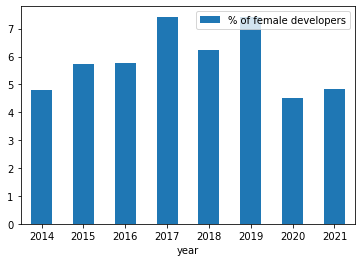

In [46]:
'''Calculating percentage of females in each year'''

females_2014 = df_2014['What is your gender?'].value_counts()['Female']/df_2014['What is your gender?'].count() * 100
females_2015 = df_2015['Gender'].value_counts()['Female']/df_2015['Gender'].count() * 100

females_2016 = df_2016['gender'].value_counts()['Female']/df_2016['gender'].count() * 100
females_2017 = df_2017['Gender'].value_counts()['Female']/df_2017['Gender'].count() * 100

females_2018 = df_2018['Gender'].value_counts()['Female']/df_2018['Gender'].count() * 100
females_2019 = df_2019['Gender'].value_counts()['Woman']/df_2019['Gender'].count() * 100

females_2020 = df_2020['Gender'].value_counts()['Woman']/df_2019['Gender'].count() * 100
females_2021 = df_2021['Gender'].value_counts()['Woman']/df_2019['Gender'].count() * 100

#bar plot to find the percentage of women respondents each year
female_growth_df = pd.DataFrame({'year':['2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021'], 
                                 '% of female developers':[females_2014, females_2015, females_2016, females_2017, females_2018, females_2019, females_2020, females_2021]
                                }
                               )
female_growth_df.plot.bar(x='year', y='% of female developers', rot=0)

Question: Are women represented more than men in the industry? Is the women headcound increasing in the industry? 

Conclusion: Seems like the % of female members are increasing over the years and takes a hit in 2020, 2021 which might be attributed to covid most certainly. The trend is definitely encouraging yet at the same time the organizations should try to scale up the women-centric initiatives, hiring drives, policies,.. so that the growth could be in double digits

#### Countries where the most developers are based in (last 5 years)

In [47]:
def country_with_most_developers(input_data, rows):
    """
        Input:
            input_data: dictionary with country name as key and num developers as value
            rows: total number of not-null records for a given year (input data)
        Output:
            country name with most developers and its value
    """
    
    country = max(input_data, key=input_data.get)
    developers_fraction = max(input_data.values())/rows * 100
    
    return country, developers_fraction

In [48]:
# df_2016["country"].value_counts()[0]

In [49]:
most_dev_2011 = country_with_most_developers(df_2011['What Country or Region do you live in?'].value_counts().to_dict(), df_2011['What Country or Region do you live in?'].count())
most_dev_2012 = country_with_most_developers(df_2012['What Country or Region do you live in?'].value_counts().to_dict(), df_2012['What Country or Region do you live in?'].count())

most_dev_2013 = country_with_most_developers(df_2013['What Country or Region do you live in?'].value_counts().to_dict(), df_2013['What Country or Region do you live in?'].count())
most_dev_2014 = country_with_most_developers(df_2014['What Country do you live in?'].value_counts().to_dict(), df_2014['What Country do you live in?'].count())

most_dev_2015 = country_with_most_developers(df_2015["Country"].value_counts().to_dict(), df_2015["Country"].count())

most_dev_2016 = country_with_most_developers(df_2016["country"].value_counts().to_dict(), df_2016["country"].count())
most_dev_2017 = country_with_most_developers(df_2017["Country"].value_counts().to_dict(), df_2017["Country"].count())

most_dev_2018 = country_with_most_developers(df_2018["Country"].value_counts().to_dict(), df_2018["Country"].count())
most_dev_2019 = country_with_most_developers(df_2019["Country"].value_counts().to_dict(), df_2019["Country"].count())

most_dev_2020 = country_with_most_developers(df_2020["Country"].value_counts().to_dict(), df_2020["Country"].count())
most_dev_2021 = country_with_most_developers(df_2021["Country"].value_counts().to_dict(), df_2021["Country"].count())

In [50]:
most_dev_2021

('United States of America', 18.322367238341783)

In [51]:
most_dev_location_dict = {
    '2011': most_dev_2011,
    '2012': most_dev_2012,
    '2013': most_dev_2013,
    '2014': most_dev_2014,
    '2015': most_dev_2015,
    '2016': most_dev_2016,
    '2017': most_dev_2017,
    '2018': most_dev_2018,
    '2019': most_dev_2019,
    '2020': most_dev_2020,
    '2021': most_dev_2021
}

In [52]:
most_dev_location_dict

{'2011': ('United States of America', 36.85145700071073),
 '2012': ('United States of America', 28.58744394618834),
 '2013': ('United States of America', 32.65243276534592),
 '2014': ('United States', 27.83882783882784),
 '2015': ('United States', 18.770520985798488),
 '2016': ('United States', 24.382293617634346),
 '2017': ('United States', 22.289461394769614),
 '2018': ('United States', 20.63021240717979),
 '2019': ('United States', 23.604241078973757),
 '2020': ('United States', 19.460918966163064),
 '2021': ('United States of America', 18.322367238341783)}

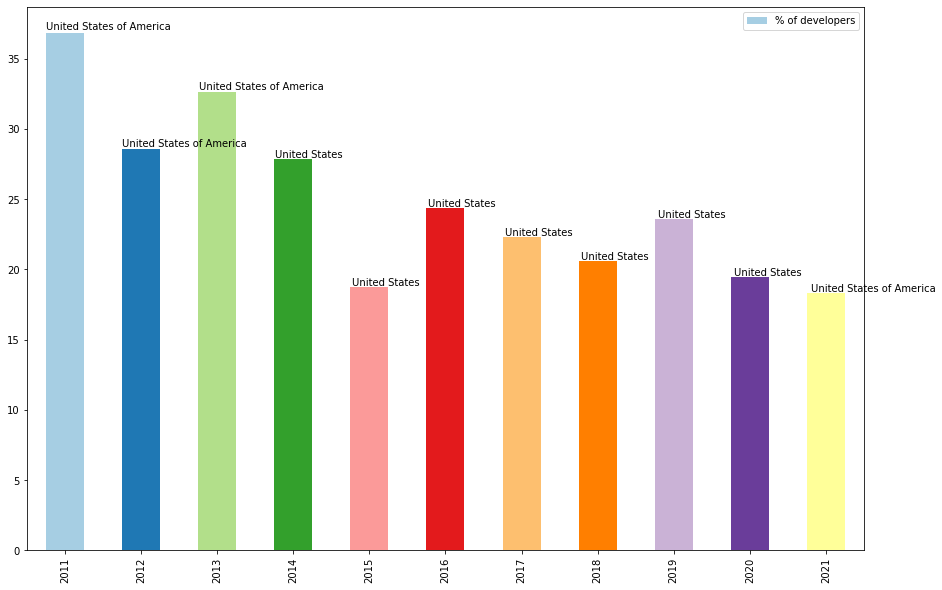

In [58]:
#bar chart to display the country with the most number of developers

df_most_dev_location = pd.DataFrame({'% of developers': list(map(lambda x: x[1], most_dev_location_dict.values()))},
                                    index = list(most_dev_location_dict.keys())
                                   ) 

ax = df_most_dev_location.plot.bar(figsize=(15,10), color=[plt.cm.Paired(np.arange(len(df_most_dev_location)))])

for i, p in enumerate(list(ax.patches)):
    ax.annotate(str(list(map(lambda x: x[0], most_dev_location_dict.values()))[i]), (p.get_x() * 1.005, p.get_height() * 1.005))

Question: Would be developers community prefer a specific country/location for the work (could be because of any factor - say more opportunities in a country?)

Conclusion:
As is evident from the graph above, most of the developers are based in the United States.

This could be attributed to a number of factors like most the tech firms' headquarters are based in the states which imbibe a culture of tech-oriented people who like to then move to the states itself

#### Get the most popular development environment

In [59]:
df_2017["IDE"]

0                                              Atom; Xcode
1        Atom; Notepad++; Vim; PyCharm; RubyMine; Visua...
2                              Sublime Text; Vim; IntelliJ
3        Notepad++; Sublime Text; TextMate; Vim; IPytho...
4                                                      NaN
                               ...                        
51387                          Sublime Text; Visual Studio
51388                    Notepad++; Sublime Text; NetBeans
51389                                                  NaN
51390                                    Emacs; Vim; Xcode
51391                    Notepad++; Eclipse; Visual Studio
Name: IDE, Length: 51392, dtype: object

In [60]:
def popular_dev_env(input_data):
    """Input: series where each entry corresponds to the user's response for most popular development environment
       Output: most popular envrionment name, and the fraction of users who uses this environment
    """
    
    dictionary = collections.defaultdict(int)
    
    ## iterate over each entry/record in the input
    for data in input_data:
        if not pd.isnull(data):
            dev_envs = [x.strip().lower() for x in data.split(";")]
            
            ## iterate over each environment (in case of multiple ones)
            for env in dev_envs:
                dictionary[env] += 1
    
    ## return the dictionary item with max. value
    return max(dictionary, key=dictionary.get), max(dictionary.values())/(input_data.count()) * 100

In [61]:
popular_dev_env(df_2017["IDE"])

('visual studio', 38.17192296957857)

In [62]:
pop_env_2017 = popular_dev_env(df_2017["IDE"])

pop_env_2018 = popular_dev_env(df_2018["IDE"])

pop_env_2019 = popular_dev_env(df_2019["DevEnviron"])

In [63]:
pop_dev_env_dict = {
    '2017': pop_env_2017,
    '2018': pop_env_2018,
    '2019': pop_env_2019
}

In [64]:
print(pop_dev_env_dict)

{'2017': ('visual studio', 38.17192296957857), '2018': ('visual studio code', 34.855035942597944), '2019': ('visual studio code', 50.747277162522764)}


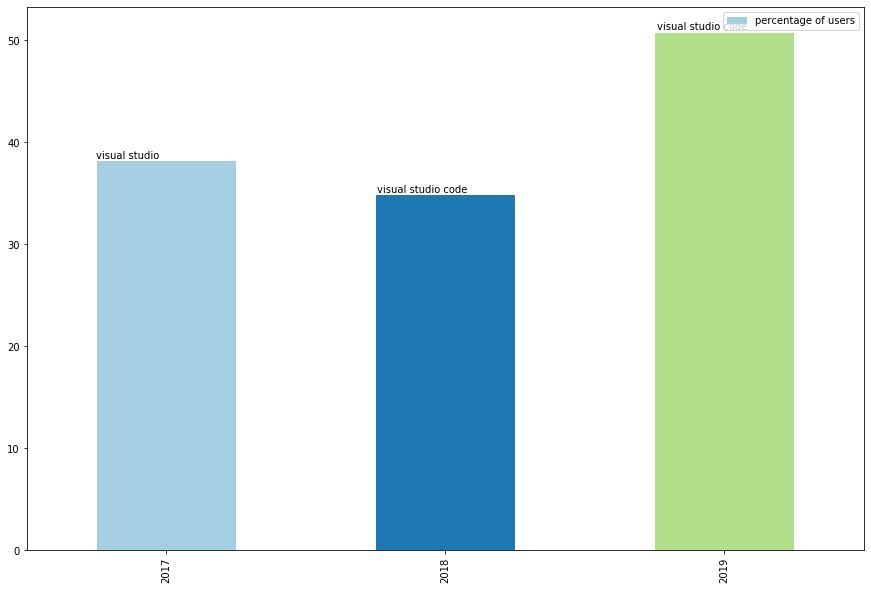

In [65]:
#bar chart to display the most popular IDE for each year

df = pd.DataFrame({'percentage of users': list(map(lambda x: x[1], pop_dev_env_dict.values()))},index=list(pop_dev_env_dict.keys()) ) 
ax = df.plot.bar(figsize=(15,10), color=[plt.cm.Paired(np.arange(len(df)))])

for i, p in enumerate(list(ax.patches)):
    ax.annotate(str(list(map(lambda x: x[0], pop_dev_env_dict.values()))[i]), (p.get_x() * 1.005, p.get_height() * 1.005))

Question: Is there any specific preference or need for a specific type of editor? Or the most popular editor keeps on changing over the years?

Answer:
Seems like “Visual Studio” is the obvious choice of the developers which appears a bit surprising to me but at the same time reflects very nicely on the satisfaction level of users with visual studio. Other platforms might try out visual studio to see and understand for themselves why visual studio is the most popular choice and try to incorporate similar features

#### Data modeling

Data modeling is not needed in this specific use case as the business questions of interest could be answered directly via the route of Data exploration